In [67]:
import pandas as pd
import numpy as np

## Traning Data

In [68]:
## LOADING THE TRANING DATA AND TAKING THE SUMMARY AND GENRE
train_data = []
with open('moive_dataset/Genre Classification Dataset/train_data.txt', 'r') as file:
    for line in file:
        part = line.strip().split(' ::: ')
        train_data.append(part[2:])  # avoiding the searial no .

In [69]:
train_data[0]

['drama',
 'Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.']

In [70]:
train_df = pd.DataFrame(train_data, columns=['genre', 'summary'])

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   genre    54214 non-null  object
 1   summary  54214 non-null  object
dtypes: object(2)
memory usage: 847.2+ KB


In [6]:
df_copy = train_df  ## For backup

In [72]:
## Checking for null value
train_df.isnull().sum()

genre      0
summary    0
dtype: int64

In [73]:
## Checking for duplicate 
train_df.duplicated().sum()

109

In [74]:
train_df[train_df.duplicated]

,genre,summary
2662,short,"Held since 2005, Film Spring Open-Air has been..."
3398,drama,"Olga, Masha, and Irina Prozoroff lead lonely a..."
7820,family,Award of the American academy of cinematograph...
9944,short,We hear from director/producer Kathryn Bigelow...
10479,music,Grammy - music award of the American academy o...
...,...,...
52770,documentary,Lavin Jamal's fiancé went to the refugee camps...
53480,family,Award of the American academy of cinematograph...
53893,drama,"Olga, Masha, and Irina Prozoroff lead lonely a..."
53965,drama,"Katusha, a country girl, is seduced and abando..."


In [75]:
## drop duplicated
train_df.drop_duplicates(inplace= True,keep='first')

In [76]:
train_df.shape

(54105, 2)

In [77]:
train_df['genre'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

### TEST DATA 

In [78]:
# Load test data
test_data = []
with open('moive_dataset/Genre Classification Dataset/test_data.txt', 'r') as file:
    for line in file:
        part = line.strip().split(':::')
        test_data.append(part[2:])

test_df = pd.DataFrame(test_data, columns=['summary'])

In [79]:
test_df.head()adventure

,summary
0,"L.R. Brane loves his life - his car, his apar..."
1,"Spain, March 1964: Quico is a very naughty ch..."
2,One year in the life of Albin and his family ...
3,"His father has died, he hasn't spoken with hi..."
4,Before he was known internationally as a mart...


In [80]:
test_df.shape

(54200, 1)

In [81]:
test_solution_data = []
with open('moive_dataset/Genre Classification Dataset/test_data_solution.txt', 'r') as file:
    for line in file:
        genre = line.strip().split(':::')
        test_solution_data.append(genre[2:3])

In [82]:
test_solution_df = pd.DataFrame(test_solution_data, columns=['target'])


In [83]:
test_solution_df.head()

,target
0,thriller
1,comedy
2,documentary
3,drama
4,drama


In [84]:
test_solution_df.shape

(54200, 1)

In [85]:
### Vlaue counts of genre
train_df['genre'].value_counts()

genre
drama          13578
documentary    13079
comedy          7432
short           5062
horror          2204
thriller        1591
action          1313
western         1032
reality-tv       883
family           776
adventure        775
music            719
romance          671
sci-fi           647
adult            589
crime            504
animation        498
sport            430
talk-show        388
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

In [86]:
## using stemming to reduce the dupliate words 
import nltk
from nltk .stem.porter import PorterStemmer
ps =  PorterStemmer()

In [87]:
# removing puncatiutation and special characters 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from concurrent.futures import ThreadPoolExecutor
# nltk.download('stopwords') ## i am trying to remove the stopwords like ( is ,the ,that ,in ...)
stopwords.words('english')
ps = PorterStemmer()

def trasform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) # now it is a list
    y = []
    for i in text :
        if i.isalnum():
            y.append(i)
    text = y[:] ## copy the y list to text 
    y.clear() # clear the array 
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return " ".join(y)
def transform_text_parallel(text):
    with ThreadPoolExecutor() as executor:
        result = executor.map(trasform_text, [text])
    return list(result)[0]


# def stem(text): # this function will remove the duplicate like (dancing ,dance , walking ,walk )
#     y =[]
#     for i in text.split():
#         y.append(ps.stem(i))
#     return " ".join(y)

In [131]:
train_df['summary'] = train_df['summary'].apply(transform_text_parallel)
# train_df['summary'] = train_df['summary'].apply(stem)

In [ ]:
train_df

In [25]:
stem("L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa")

"l.r. brane love hi life - hi car, hi apartment, hi job, but especi hi girlfriend, vespa. one day while showering, vespa run out of shampoo. l.r. run across the street to a conveni store to buy some more, a quick trip of no more than a few minutes. when he returns, vespa is gone and everi trace of her exist ha been wipe out. l.r.' life becom a tortur exist as one strang event after anoth occur to confirm in hi mind that a conspiraci is work against hi find vespa"

In [26]:
train_df.head()

,genre,summary
0,drama,listen in to a convers between hi doctor and p...
1,thriller,a brother and sister with a past incestu relat...
2,adult,as the bu empti the student for their field tr...
3,drama,"to help their unemploy father make end meet, e..."
4,drama,the film' titl refer not onli to the un-recov ...


In [28]:
## Example()
transform_text_parallel("l.r. brane love hi life - hi car, hi apartment, hi job, but especi hi girlfriend, vespa. one day while showering, vespa run out of shampoo. l.r. run across the street to a conveni store to buy some more, a quick trip of no more than a few minutes. when he returns, vespa is gone and everi trace of her exist ha been wipe out. l.r.' life becom a tortur exist as one strang event after anoth occur to confirm in hi mind that a conspiraci is work against hi find vespa")

'brane love hi life hi car hi apart hi job especi hi girlfriend vespa one day shower vespa run shampoo run across street conveni store buy quick trip minut return vespa gone everi trace exist ha wipe life becom tortur exist one strang event anoth occur confirm hi mind conspiraci work hi find vespa'

In [30]:
# train_df['trans_summary'] = train_df['summary'].apply(transform_text_parallel)

In [89]:
train_df['summary'].head()

0    listen conver doctor parent oscar learn nobodi...
1    brother sister past incestu relationship curre...
2    bu empti student field trip museum natur histo...
3    help unemploy father make end meet edith twin ...
4    film titl refer bodi ground zero also state na...
Name: summary, dtype: object

In [32]:
tran_df2 = train_df  # for backup

In [90]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [91]:
train_df['target'] = encoder.fit_transform(train_df['genre'])

In [92]:
train_df[train_df['target']==0]

,genre,summary,target
24,action,relea prison short time follow fail attempt ro...,0
32,action,thai town area near hollywood lo angel home ex...,0
108,action,gang studi paranoia power follow unspecifi job...,0
143,action,retreat british govern hong kong team elit sec...,0
157,action,demi chain way success normal life demi unknow...,0
...,...,...,...
54030,action,beauti asta sister tempera vike warrior kar ki...,0
54034,action,nypd cop ruda cop day religi santerio high ran...,0
54062,action,action imax film salt flat lake mead outsid la...,0
54091,action,ecw titl tabl ladder chair cane match justin c...,0


In [93]:
test_solution_df = encoder.fit_transform(test_solution_df['target'])

In [94]:
test_solution_df

array([24,  5,  7, ...,  1,  8,  8])

In [281]:
train_df[train_df['target']==1] 

,genre,summary,target
2,adult,bu empti student field trip museum natur histo...,1
72,adult,casino roulett game system break bank sound li...,1
84,adult,fashion design gene buxom wife debbi love coup...,1
124,adult,busi motel becom fantasi ground occup first po...,1
233,adult,kinki director scene player aiden starr friend...,1
...,...,...,...
53759,adult,two success busi men kevin jame tom byron gran...,1
53829,adult,bless god handsom face nobl physiqu johnni bro...,1
53858,adult,husband appear becom bore marriag pretti blond...,1
53936,adult,time toni de sergio steve hooper fellow scotti...,1


In [282]:
labels = ['action','adult','adventure','animation','biography','comedy','crime','documentary','drama','family','fantasy','game-show','history',
         'horror','music','musical','mystery','news','reality-tv','romance','sci-fi','short','sport','talk-show','thriller','war','western',]

### Finding the importance of the words 

In [133]:
import matplotlib.pyplot as plt

In [134]:
from wordcloud import WordCloud
wc =WordCloud(width = 500,height=500 ,min_font_size=10,background_color='white')

In [135]:
action = wc.generate(train_df[train_df['target'] == 0]['summary'].str.cat(sep=" "))

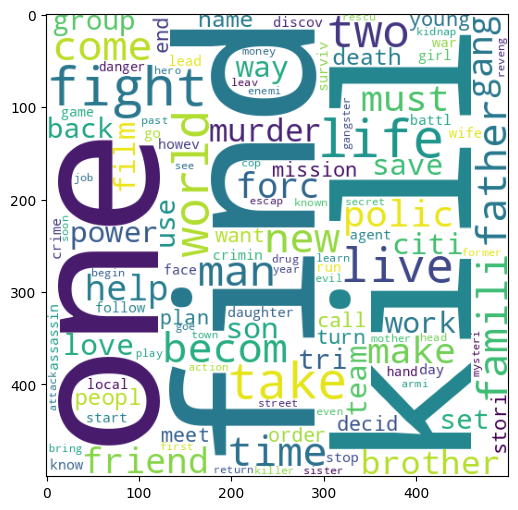

In [136]:
plt.figure(figsize = (15,6))
plt.imshow(action)

In [151]:
adult = wc.generate(train_df[train_df['target'] == 1]['summary'].str.cat(sep=" "))

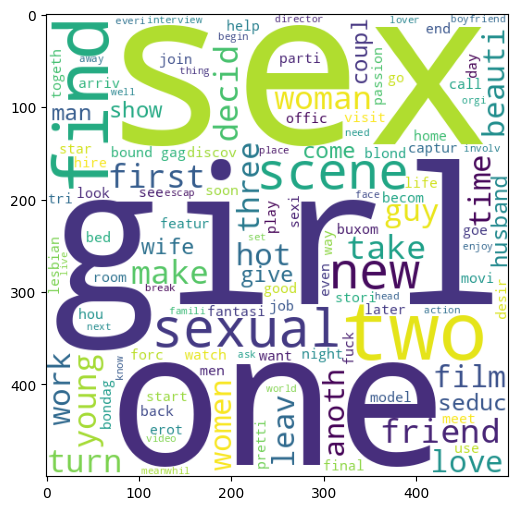

In [152]:
plt.figure(figsize = (15,6))
plt.imshow(adult)

In [153]:
adventure = wc.generate(train_df[train_df['target'] == 2]['summary'].str.cat(sep=" "))

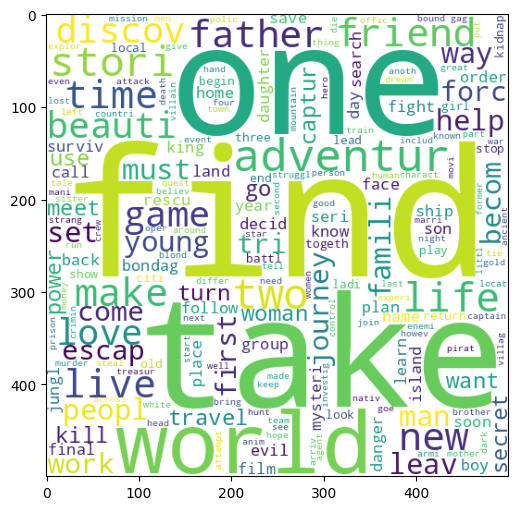

In [154]:
plt.figure(figsize = (15,6))
plt.imshow(adventure)


In [46]:
### Similarrly all the targets have some important words

In [111]:
## Top 30 words for each classes
from collections import Counter
import seaborn as sns
def get_list_words(df,i):
    corpus = []
    for msg in df[df['target']==i]['summary'].tolist():
        for word in msg.split():
            corpus.append(word)
    return corpus

In [112]:
action_words_list = get_list_words(train_df,0)
action_words_no = Counter(action_words_list)
action = pd.DataFrame(action_words_no.most_common(30),columns=['words','count'])

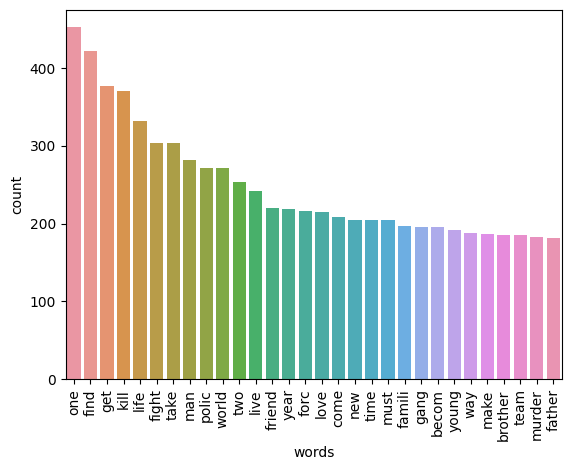

In [113]:
# Plot the barplot using seaborn with keyword arguments
sns.barplot(x='words', y='count', data=action)
plt.xticks(rotation ='vertical')
plt.show()

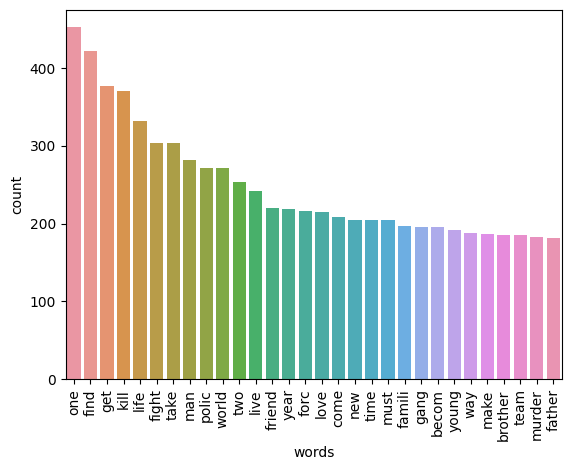

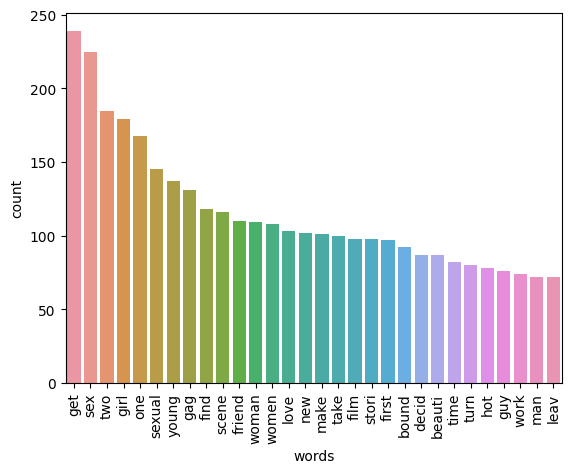

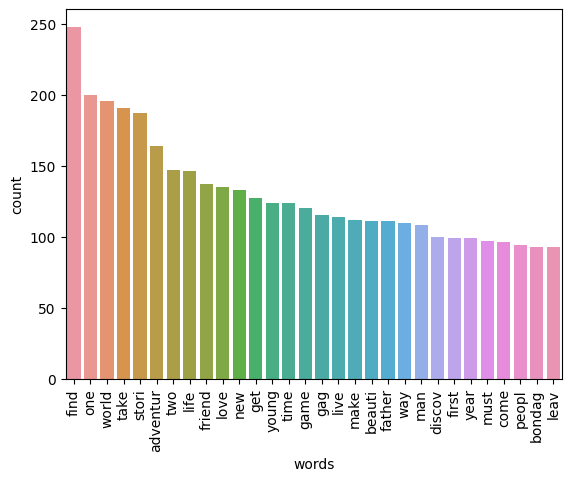

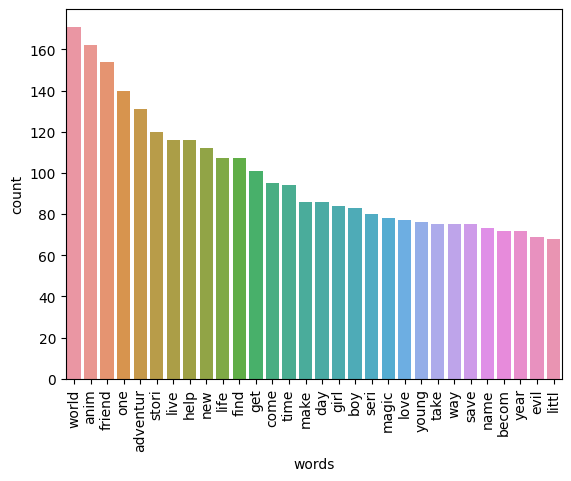

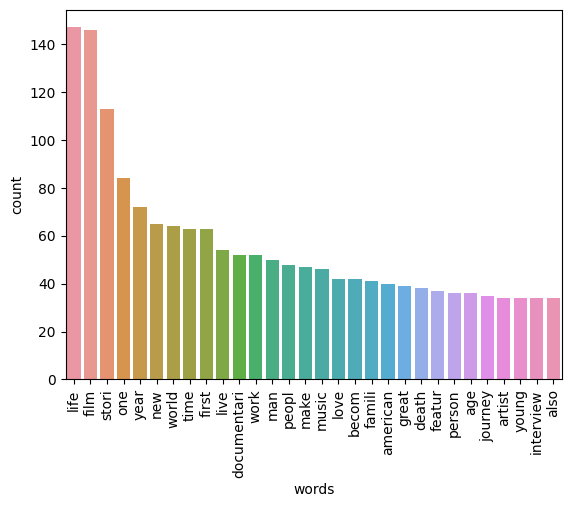

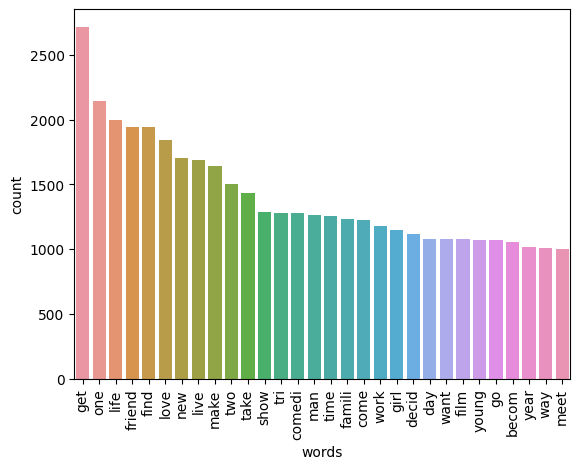

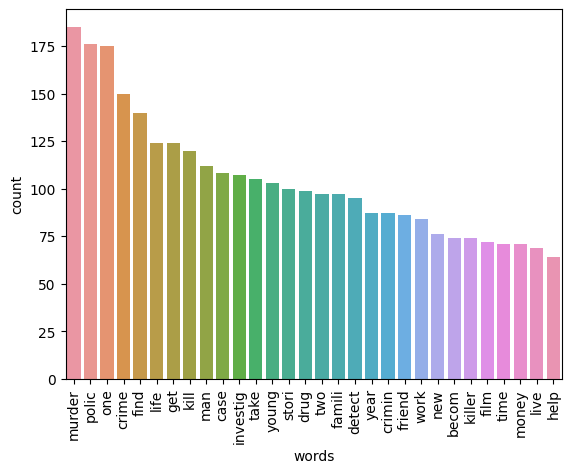

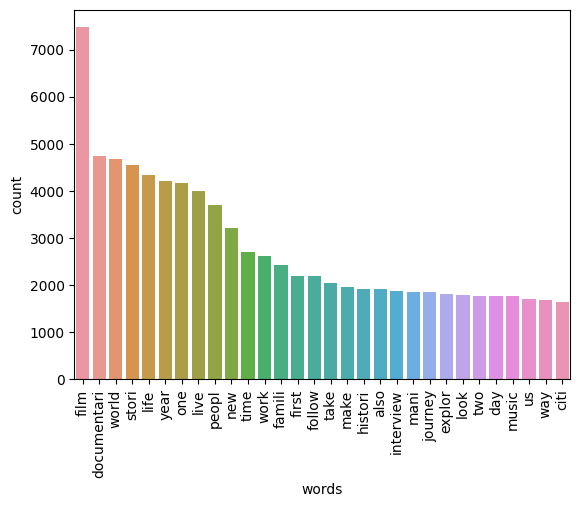

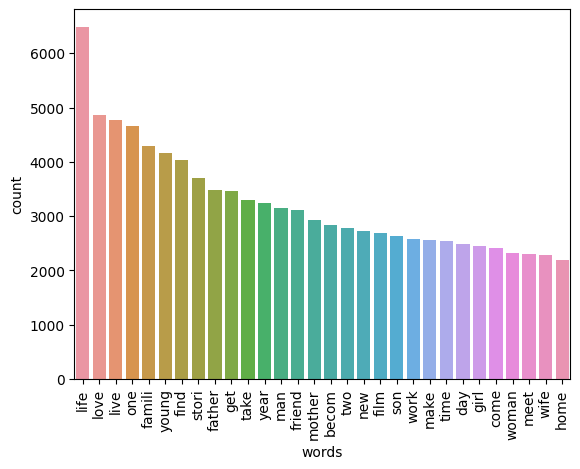

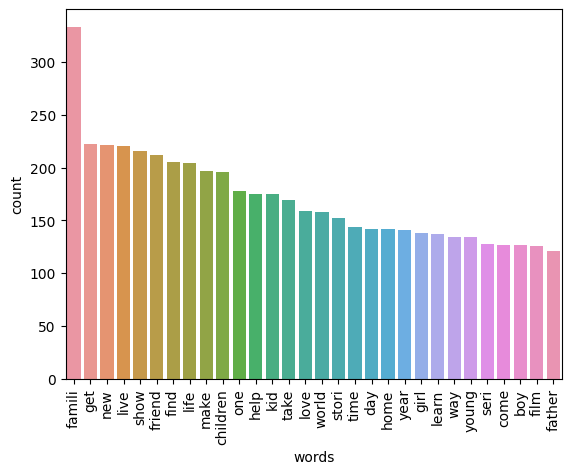

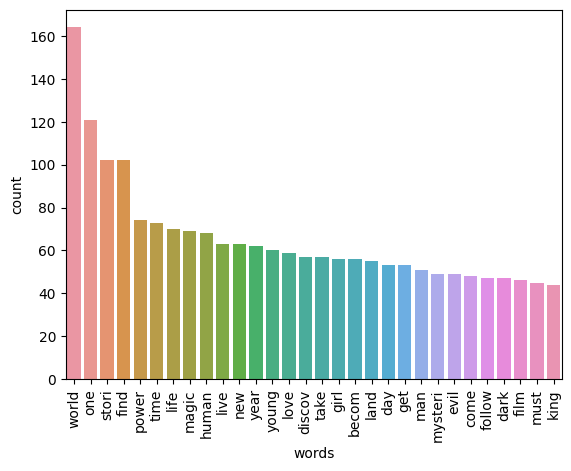

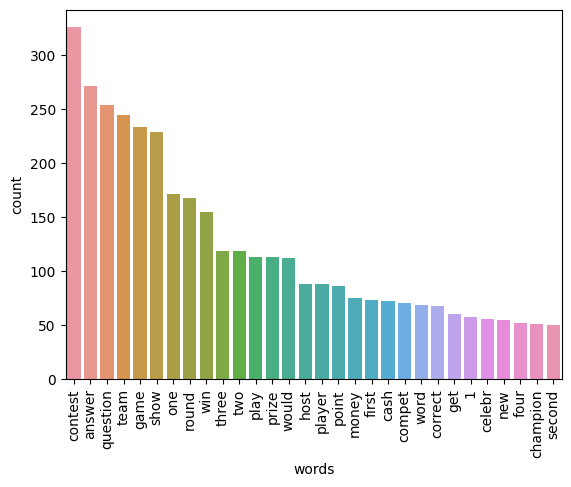

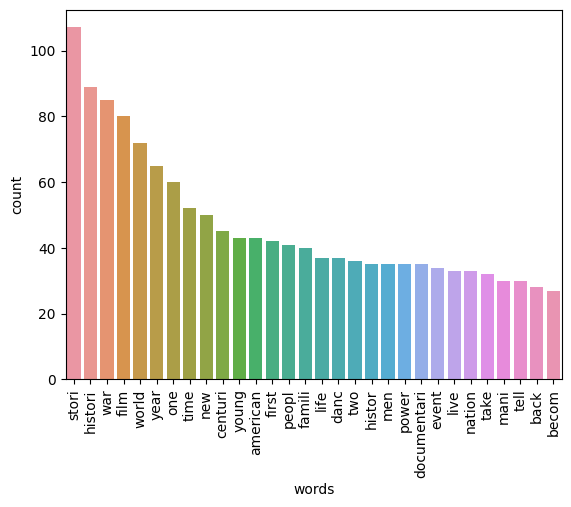

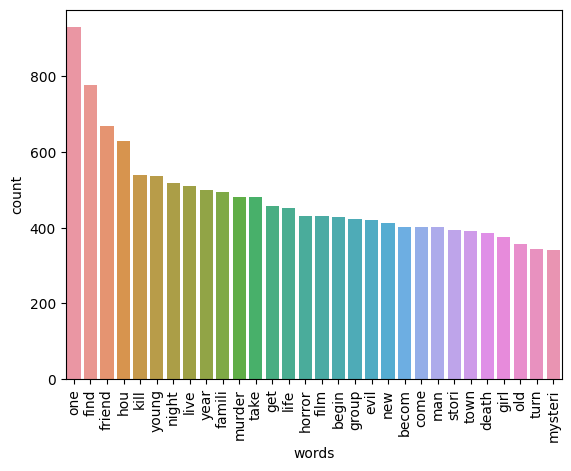

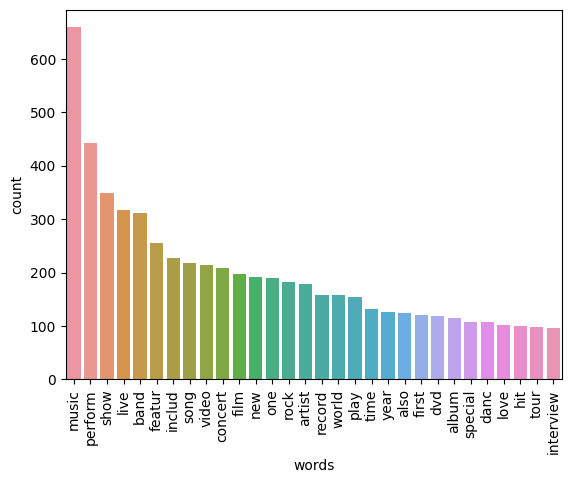

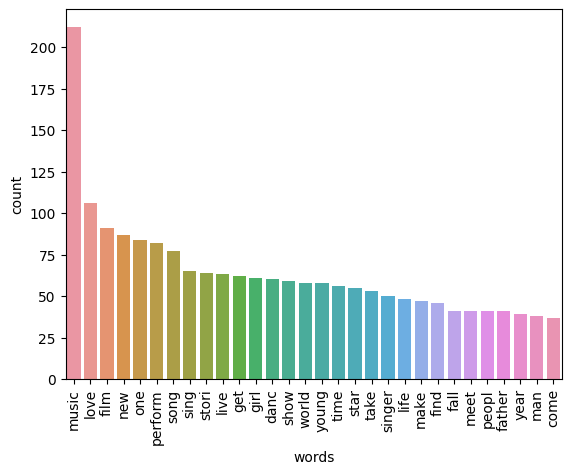

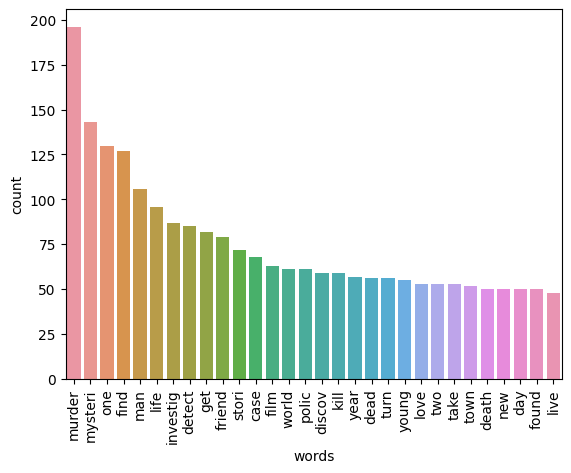

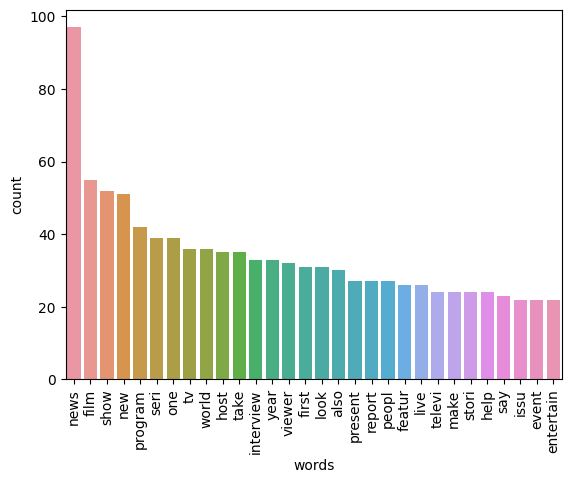

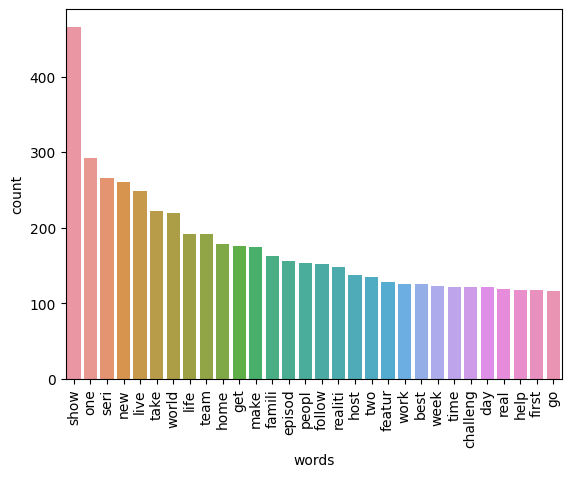

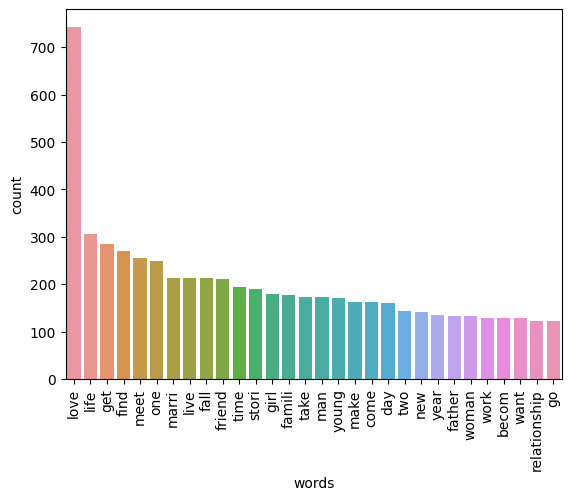

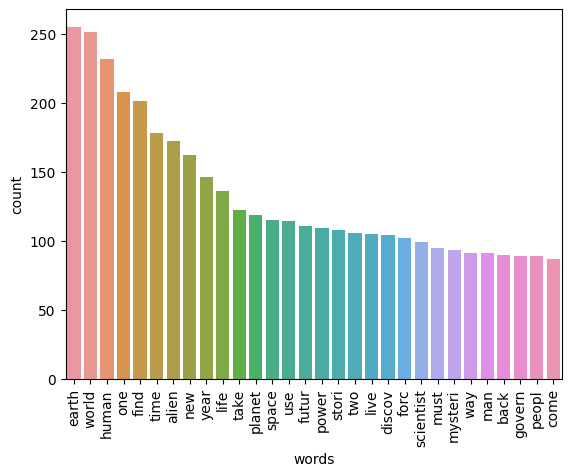

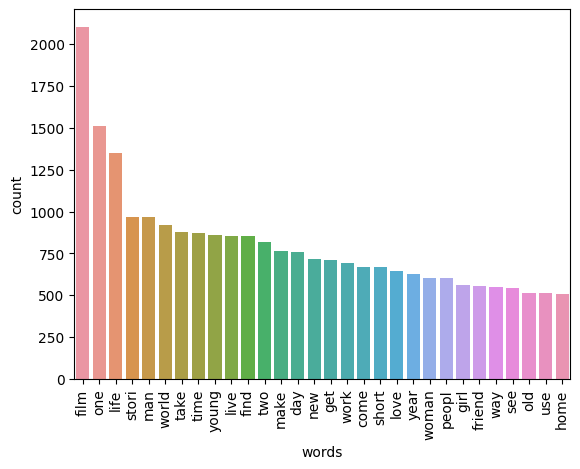

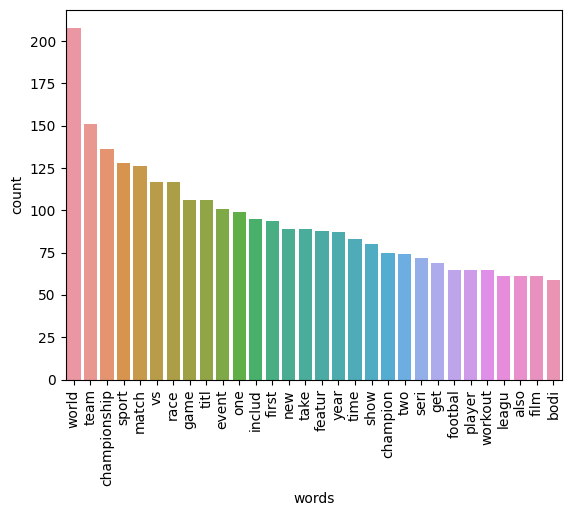

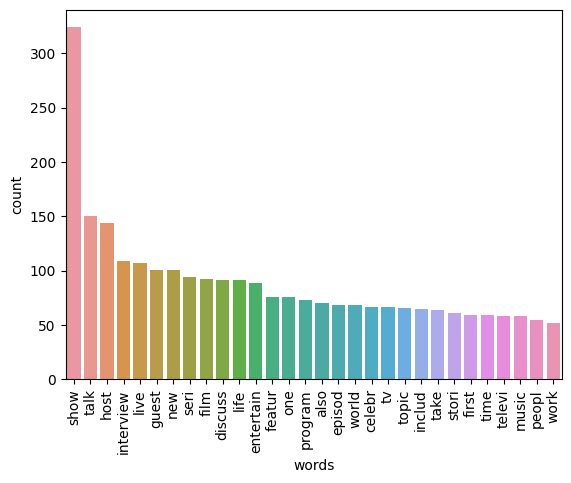

In [114]:
from collections import Counter
import seaborn as sns
def get_list_words(df,i):
    corpus = []
    for msg in df[df['target']==i]['summary'].tolist():
        for word in msg.split():
            corpus.append(word)
    return corpus
for i in range(24):
    action_words_list = get_list_words(train_df,i)
    action_words_no = Counter(action_words_list)
    action = pd.DataFrame(action_words_no.most_common(30),columns=['words','count'])
    # Plot the barplot using seaborn with keyword arguments
    sns.barplot(x='words', y='count', data=action)
    plt.xticks(rotation ='vertical')
    plt.show()


In [222]:
### Model building 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
hs = HashingVectorizer(n_features=10000)
cv = CountVectorizer(max_features=5000) 
tf = TfidfVectorizer(max_features=7000)

In [235]:
X = hs.fit_transform(train_df['summary']).toarray()

In [236]:
X.shape

(54105, 10000)

In [237]:
y = train_df['target'].values

In [238]:
y.shape

(54105,)

In [121]:
test_df['summary']

0         L.R. Brane loves his life - his car, his apar...
1         Spain, March 1964: Quico is a very naughty ch...
2         One year in the life of Albin and his family ...
3         His father has died, he hasn't spoken with hi...
4         Before he was known internationally as a mart...
                               ...                        
54195     Covering multiple genres, Tales of Light & Da...
54196     As Alice and Cora Munro attempt to find their...
54197     A movie 169 years in the making. Oliver Twist...
54198     Popular, but mysterious rock D.J Mike Mallard...
54199     Curitiba is a city in movement, with rhythms ...
Name: summary, Length: 54200, dtype: object

In [122]:
X_test = cv.fit_transform(test_df['summary']).toarray()

array([24,  5,  7, ...,  1,  8,  8])

In [145]:
test_solution_df.shape

array([24,  5,  7, ...,  1,  8,  8])

array([24,  5,  7, ...,  1,  8,  8])

In [239]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state =42)

In [240]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression()
svc = SVC(probability = True,C =1,kernel ='linear',tol=1e-3,max_iter=1000,shrinking =True)

In [183]:
## gnb 
gnb.fit(X_train,y_train)

GaussianNB()

In [172]:
y_pred_gnb= gnb.predict(X_test)

In [173]:
accuracy_score(y_test,y_pred_gnb)

0.2054338785694483

In [174]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_score(y_test,y_pred_mnb)

0.5367341280842806

In [184]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_score(y_test,y_pred_bnb)

0.48923389705202847

In [244]:
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_test,y_pred_lr)

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5720358562055263

In [246]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('mnb', mnb),
    ('lr', lr),
    ('bnb', bnb),
    
    # ('svc', svc)
], voting='soft')

In [283]:
# voting_clf.fit(X_train, y_train)

In [72]:
y_pred_voting = voting_clf.predict(X_test)
accuracy_score(y_test,y_pred_voting)

0.5698179465853433

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(estimator=mnb, 
                                n_estimators=10, 
                                random_state=42,
                                n_jobs=-1)
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

In [284]:
### unitl the lr is performing well for the HashingVectorize()n_featuress 7000) 
import pickle
pickle.dump(lr,open('model.pkl','wb'))
pickle.dump(hs,open('hs.pkl','wb'))
